In [18]:
import pandas as pd


df = pd.read_csv('C:/Users/Hi/Downloads/archive (2)/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
import pandas as pd

# Load dataset

# Count the number of instances in each class
class_counts = df['Class'].value_counts()
print("Count of each class in the dataset:")
print(class_counts)


Count of each class in the dataset:
Class
0    284315
1       492
Name: count, dtype: int64


In [20]:


missing_values = df.isnull()

missing_counts = df.isnull().sum()

print("Counts of missing values:")
print(missing_counts)


Counts of missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [21]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

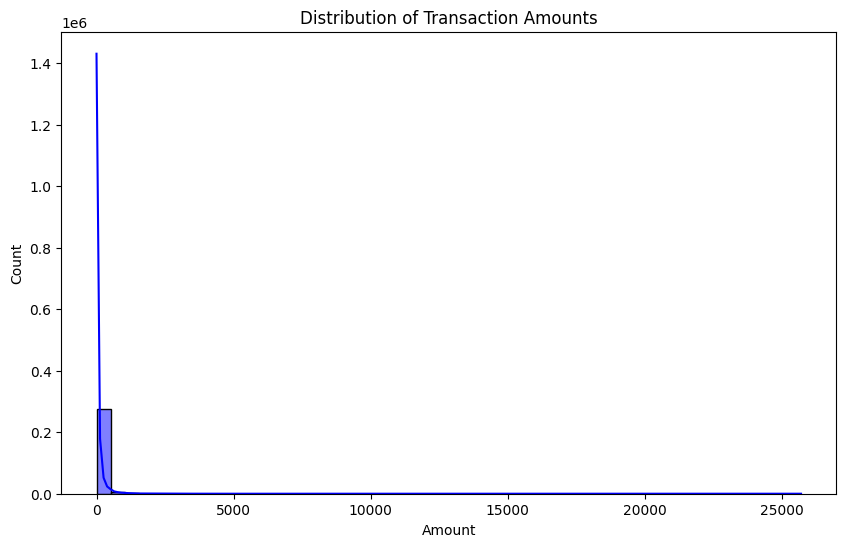

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()


C:\Users\Hi\AppData\Local\Temp\ipykernel_21716\3780796455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set1')


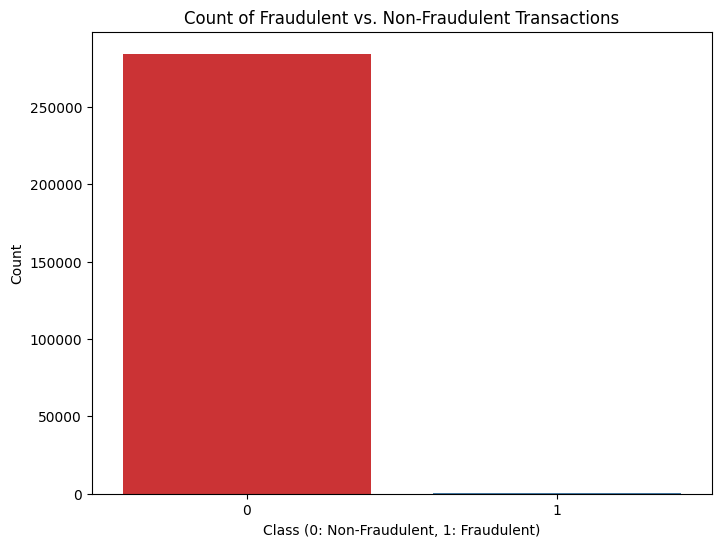

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='Set1')
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


C:\Users\Hi\AppData\Local\Temp\ipykernel_21716\1542732546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')


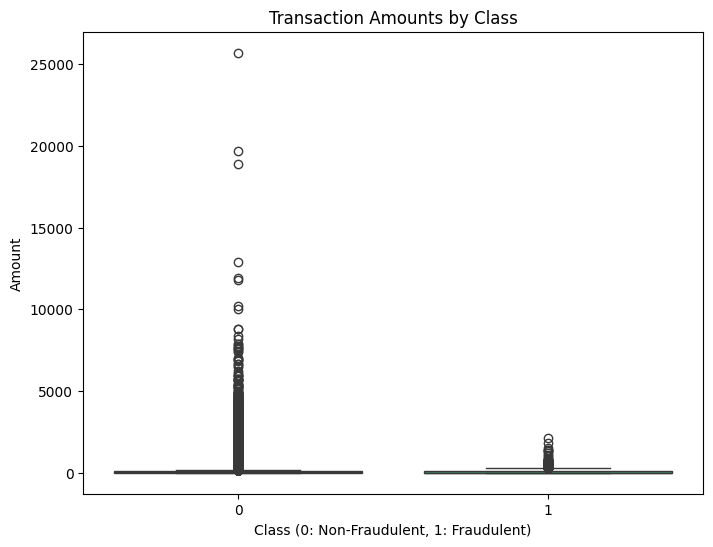

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')
plt.title('Transaction Amounts by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Amount')
plt.show()


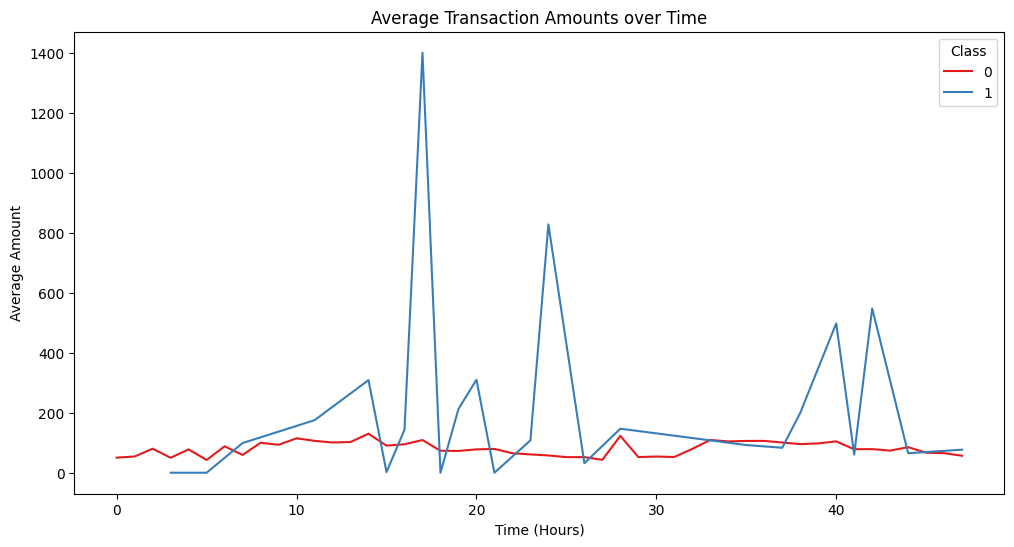

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = df.sample(frac=0.1, random_state=42) 

sampled_df['Time'] = sampled_df['Time'] // 3600

aggregated_df = sampled_df.groupby(['Time', 'Class']).Amount.mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Amount', data=aggregated_df, hue='Class', palette='Set1')
plt.title('Average Transaction Amounts over Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Average Amount')
plt.show()



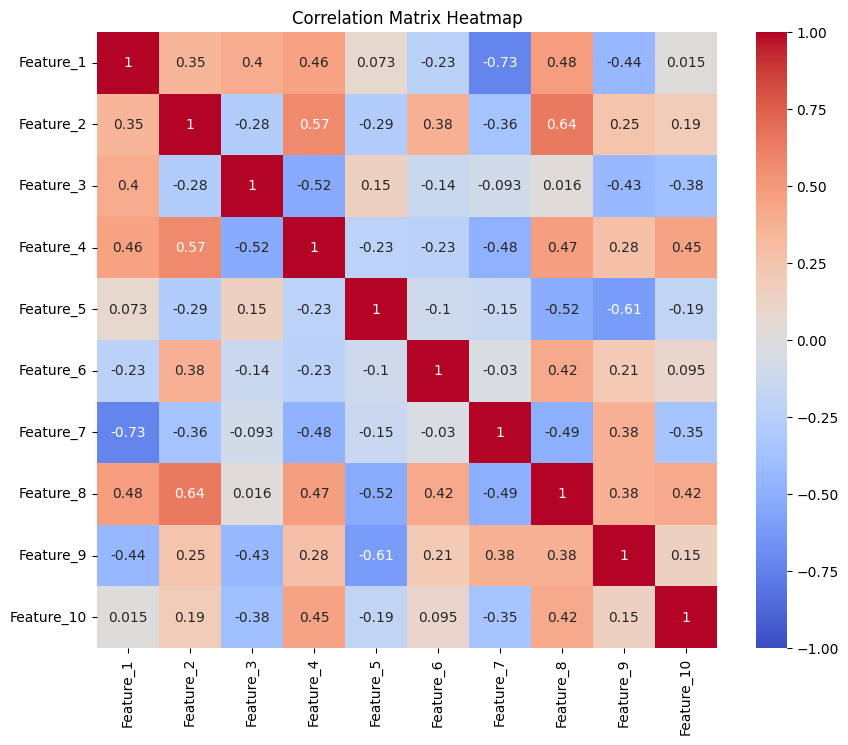

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(0)
data = np.random.rand(10, 10)
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 11)])

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Class', axis=1) 
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


KeyError: "['Class'] not found in axis"

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('C:/Users/Hi/Downloads/archive (2)/creditcard.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Classification report for Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# Classification report for Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('C:/Users/Hi/Downloads/archive (2)/creditcard.csv')

# Select the features and target
features = ['V1', 'V2', 'V3', 'V4', 'V5']
target = 'Class'

# Preprocess the data
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Function to predict Class based on manual input
def predict_class(V1, V2, V3, V4, V5):
    input_data = pd.DataFrame([[V1, V2, V3, V4, V5]], columns=features)
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return prediction[0]

# Example usage
V1 = float(input("Enter V1: "))
V2 = float(input("Enter V2: "))
V3 = float(input("Enter V3: "))
V4 = float(input("Enter V4: "))
V5 = float(input("Enter V5: "))

predicted_class = predict_class(V1, V2, V3, V4, V5)
print(f"The predicted class is: {predicted_class}")


The predicted class is: 0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('C:/Users/Hi/Downloads/archive (2)/creditcard.csv')

# Check for missing values
print(df.isnull().sum())

# Select features and target
features = [col for col in df.columns if col != 'Class']
target = 'Class'

X = df[features]
y = df[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


# Load dataset

# Count the number of instances in each class
class_counts = df['Class'].value_counts()
print("Count of each class in the dataset:")
print(class_counts)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Count of each class in the dataset:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(df_majority),    # to match majority class
                                   random_state=42) # reproducible results

# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Display new class counts
print("Count of each class after oversampling:")
print(df_oversampled['Class'].value_counts())


NameError: name 'resample' is not defined